In [ ]:
import tensorflow as tf
import numpy as np

test_data=np.load("c_test_data.npy")
test_label=np.load("c_test_label.npy")
img_size=32
batch_size=128
img_channel=3
acc_max=0
conv_kernel_1=64
conv_kernel_2=128
conv_kernel_3=256
kernel_size_1=5
kernel_size_2=5
kernel_size_3=3
keep_prob_use=0.7
length_of_fc1=(img_size//4)*(img_size//4)*conv_kernel_3
fc1_num=1600
num_batch=50000//batch_size
def weight_variable(shape):
    initial=tf.truncated_normal(shape,stddev=0.01)
    return tf.Variable(initial)
def biase_variable(shape):
    init=tf.constant(0.1,shape=shape)
    return tf.Variable(init)

def conv_2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')
def max_pool(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

x=tf.placeholder(tf.float32,[None,img_size,img_size,img_channel])
y=tf.placeholder(tf.float32,[None,10])
keep_prob=tf.placeholder(tf.float32)

x_image=tf.reshape(x,[-1,img_size,img_size,img_channel])
#
W_conv1=weight_variable([kernel_size_1,kernel_size_1,img_channel,conv_kernel_1])  # 32 kernels extract feature from 3 plane
b_conv1=biase_variable([conv_kernel_1])
h_conv1=tf.nn.leaky_relu(conv_2d(x_image,W_conv1)+b_conv1)
h_pool1=max_pool(h_conv1)


w_conv2=weight_variable([kernel_size_2,kernel_size_2,conv_kernel_1,conv_kernel_2])
b_conv2=biase_variable([conv_kernel_2])
h_conv2=tf.nn.leaky_relu(conv_2d(h_pool1,w_conv2)+b_conv2)
h_pool2=max_pool(h_conv2)

w_conv3=weight_variable([kernel_size_3,kernel_size_3,conv_kernel_2,conv_kernel_3])
b_conv3=biase_variable([conv_kernel_3])
h_conv3=tf.nn.leaky_relu(conv_2d(h_pool2,w_conv3)+b_conv3)


W_fc1_buff=weight_variable([length_of_fc1,fc1_num])
b_fc1=biase_variable([fc1_num])
W_fc1 = tf.nn.dropout(W_fc1_buff, keep_prob) 

h_pool2_flat=tf.reshape(h_conv3,[-1,length_of_fc1])
h_fc1=tf.nn.leaky_relu(tf.matmul(h_pool2_flat,W_fc1)+b_fc1)

W_fc2_buff=weight_variable([fc1_num,10])
b_fc2=biase_variable([10])
W_fc2 = tf.nn.dropout(W_fc2_buff, keep_prob) 
##
prediction=tf.nn.softmax(tf.matmul(h_fc1,W_fc2)+b_fc2)
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=prediction))
#tf.nn.sparse_softmax_cross_entropy_with_logits
train_step=tf.train.AdamOptimizer(0.9*(1e-4)).minimize(cross_entropy)
#结果存放在布尔变量中
correct_prediction=tf.equal(tf.argmax(prediction,1),tf.argmax(y,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))


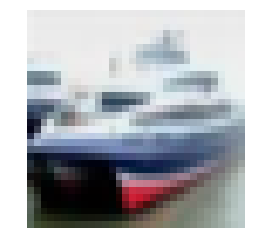

INFO:tensorflow:Restoring parameters from checkpoint_dir/cifar10
output  [[1.3110686e-14 4.1595891e-02 3.4685382e-33 4.1585882e-25 2.3290797e-29
  1.9329870e-32 7.5994284e-33 1.5588174e-35 9.5840406e-01 2.5925024e-23]]
this picture is [8]hydrofoil
ok


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片


test_data=np.load("c_test_data.npy")
test_label=np.load("c_test_label.npy")
img_size=32
batch_size=128
img_channel=3
acc_max=0
conv_kernel_1=64
conv_kernel_2=128
conv_kernel_3=256
kernel_size_1=5
kernel_size_2=5
kernel_size_3=3
keep_prob_use=0.7
length_of_fc1=(img_size//4)*(img_size//4)*conv_kernel_3
fc1_num=1600
num_batch=50000//batch_size
x=tf.placeholder(tf.float32,[img_size,img_size,3])
y=tf.placeholder(tf.float32,[10])
keep_prob=tf.placeholder(tf.float32)
#############3333
test_pic=np.array(test_data[1],np.int16)
color_buff=np.zeros([32,32],np.int16)
for i in range(32):
    for j in range(32):
        color_buff[i][j]=test_pic[i][j][0]
        test_pic[i][j][0]=test_pic[i][j][2]
        test_pic[i][j][2]=color_buff[i][j]

#################3
#w=tf.Variable(tf.zeros([img_size,img_size,3,100]))
#b=tf.Variable(tf.zeros([100]))

def weight_variable(shape):
    initial=tf.truncated_normal(shape,stddev=0.01)
    return tf.Variable(initial)
def biase_variable(shape):
    init=tf.constant(0.1,shape=shape)
    return tf.Variable(init)

def conv_2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')
def max_pool(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

#输入层
x_image=tf.reshape(x,[-1,img_size,img_size,img_channel])
#
W_conv1=weight_variable([kernel_size_1,kernel_size_1,img_channel,conv_kernel_1])  # 32 kernels extract feature from 3 plane
b_conv1=biase_variable([conv_kernel_1])
h_conv1=tf.nn.leaky_relu(conv_2d(x_image,W_conv1)+b_conv1)
h_pool1=max_pool(h_conv1)


w_conv2=weight_variable([kernel_size_2,kernel_size_2,conv_kernel_1,conv_kernel_2])
b_conv2=biase_variable([conv_kernel_2])
h_conv2=tf.nn.leaky_relu(conv_2d(h_pool1,w_conv2)+b_conv2)
h_pool2=max_pool(h_conv2)

w_conv3=weight_variable([kernel_size_3,kernel_size_3,conv_kernel_2,conv_kernel_3])
b_conv3=biase_variable([conv_kernel_3])
h_conv3=tf.nn.leaky_relu(conv_2d(h_pool2,w_conv3)+b_conv3)


W_fc1_buff=weight_variable([length_of_fc1,fc1_num])
b_fc1=biase_variable([fc1_num])
W_fc1 = tf.nn.dropout(W_fc1_buff, keep_prob) 

h_pool2_flat=tf.reshape(h_conv3,[-1,length_of_fc1])
h_fc1=tf.nn.leaky_relu(tf.matmul(h_pool2_flat,W_fc1)+b_fc1)

W_fc2_buff=weight_variable([fc1_num,10])
b_fc2=biase_variable([10])
W_fc2 = tf.nn.dropout(W_fc2_buff, keep_prob) 
##
saver=tf.train.Saver()
prediction=tf.nn.softmax(tf.matmul(h_fc1,W_fc2)+b_fc2)
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=prediction))
#tf.nn.sparse_softmax_cross_entropy_with_logits
train_step=tf.train.AdamOptimizer(0.9*(1e-4)).minimize(cross_entropy)
#结果存放在布尔变量中
correct_prediction=tf.equal(tf.argmax(prediction,1),tf.argmax(y,1))
category_buff=tf.argmax(prediction,1)
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
##
saver=tf.train.Saver()
plt.imshow(test_pic)
plt.axis('off') # 不显示坐标轴
plt.show()
with tf.Session() as sess:


    saver.restore(sess,"checkpoint_dir/cifar10")
       
    acc=sess.run(prediction,feed_dict={x:test_data[1],keep_prob:keep_prob_use})
    category=sess.run(tf.argmax(acc,1))
    #category=sess.run(category_buff,feed_dict={acc:prediction})
    print("output  "+str(acc))
print("this picture is "+str(category)+"hydrofoil")
print("ok")

In [ ]:
logs_train_dir="./checkpoint_dir/cifar10"
with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    saver=tf.train.Saver()
    ckpt = tf.train.get_checkpoint_state(logs_train_dir)  

In [4]:
acc=np.array(acc)

In [7]:
acc=acc.reshape(10,1)

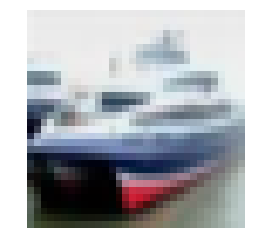

output  [[1.3110686e-14]
 [4.1595891e-02]
 [3.4685382e-33]
 [4.1585882e-25]
 [2.3290797e-29]
 [1.9329870e-32]
 [7.5994284e-33]
 [1.5588174e-35]
 [9.5840406e-01]
 [2.5925024e-23]]
this picture is [8]hydrofoil


In [9]:
plt.imshow(test_pic)
plt.axis('off') # 不显示坐标轴
plt.show()
print("output  "+str(acc))
print("this picture is "+str(category)+"hydrofoil")